## Description 


The dataset "class_marks.csv" consists of students' marks from various questions in an exam. The structure of the dataset includes columns representing different question numbers and their respective marks. Some questions are divided into sub-parts, such as Q1aM4, Q1bM6, Q2aM6, Q2bM4, and so on. These sub-parts indicate that the total score for a question is the sum of multiple components.

Upon initial inspection, the dataset contained some missing values, which were later handled during the cleaning process. The Total column represents the sum of all question scores for each student, indicating their final score in the exam. Several data transformation steps were necessary, including merging sub-questions into single columns (e.g., combining Q1aM4 and Q1bM6 into Q1). Additionally, redundant columns were dropped to streamline the dataset.

To ensure consistency, the dataset was converted to integer format (int64) after handling missing values. Some specific score values (like 39 and 36) were replaced with 40, possibly to correct inconsistencies in grading. These modifications helped refine the dataset for more effective analysis.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("MIDMARKS.xlsx")

In [2]:
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19,8,8,19,17,18
714,NaN,ZETA,12,1,7,10,20,8
715,NaN,ZETA,17,6,14,14,17,18
716,NaN,ZETA,12,1,6,7,15,12


### Reads data from 'MIDMARKS.xlsx'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.NO     601 non-null    float64
 1   SECTION  691 non-null    object 
 2   DV       716 non-null    object 
 3   M-II     716 non-null    object 
 4   PP       716 non-null    object 
 5   BEEE     716 non-null    object 
 6   FL       715 non-null    object 
 7   FIMS     716 non-null    object 
dtypes: float64(1), object(7)
memory usage: 45.0+ KB


In [5]:
df[df['DV'].isnull()]

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
564,565.0,SIGMA,NaN,NaN,NaN,NaN,NaN,NaN
601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna(subset=['DV'])
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19,8,8,19,17,18
714,NaN,ZETA,12,1,7,10,20,8
715,NaN,ZETA,17,6,14,14,17,18
716,NaN,ZETA,12,1,6,7,15,12


### Displays whole summary of the code


In [8]:
df.rename(columns={'M-II':'M2'},inplace=True) 
df

C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\3007035982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'M-II':'M2'},inplace=True)


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19,8,8,19,17,18
714,NaN,ZETA,12,1,7,10,20,8
715,NaN,ZETA,17,6,14,14,17,18
716,NaN,ZETA,12,1,6,7,15,12


### renames M-II as M2

In [10]:
df['DV'] = pd.to_numeric(df['DV'], errors='coerce')
df['M2'] = pd.to_numeric(df['M2'], errors='coerce')
df['PP'] = pd.to_numeric(df['PP'], errors='coerce')
df['BEEE'] = pd.to_numeric(df['BEEE'], errors='coerce')
df['FL'] = pd.to_numeric(df['FL'], errors='coerce')
df['FIMS'] = pd.to_numeric(df['FIMS'], errors='coerce')
df.fillna(0, inplace=True)

C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\1473698917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DV'] = pd.to_numeric(df['DV'], errors='coerce')
C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\1473698917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['M2'] = pd.to_numeric(df['M2'], errors='coerce')
C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\1473698917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

### Conerting into numbers


In [12]:
df['Total'] = df['DV'] + df['M2'] + df['PP'] + df['BEEE'] + df['FL'] + df['FIMS']

df


C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\4026183173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['DV'] + df['M2'] + df['PP'] + df['BEEE'] + df['FL'] + df['FIMS']


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0
...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0


### Adding Total column and Caluclating Total

In [14]:
df["Percentage"] = (df['Total']/120)*100

C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\3999239091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Percentage"] = (df['Total']/120)*100


### Adding Percentage coloumn and calculating

In [16]:
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.000000
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.000000
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.000000
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.333333
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.500000
...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74.166667
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48.333333
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,71.666667
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44.166667


In [17]:
df['Percentage'] = df['Percentage'].round().astype(int)
df

C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\1999675392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Percentage'] = df['Percentage'].round().astype(int)


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92
...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,72
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44


### Round-figure of the Percentage

In [19]:
def assign_grade(percentage):
    if percentage >= 90:
        return 'A'
    elif percentage >= 80:
        return 'B+'
    elif percentage >= 70:
        return 'B'
    elif percentage >= 60:
        return 'C+'
    elif percentage >=50:
        return 'C'
    elif percentage >=40:
        return 'D'
    else:
        return 'F'
df['Grade'] = df['Percentage'].apply(assign_grade)
df

C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\2453317957.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grade'] = df['Percentage'].apply(assign_grade)


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60,C+
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70,B
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85,B+
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78,B
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92,A
...,...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74,B
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48,D
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,72,B
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44,D


### Adding and Calculating the Grade coloumn

In [21]:
a=df.loc[(df['Total'] >= 75) & (df['Total'] <= 80)]
a=a.reset_index()
a

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,31,32.0,ALPHA,12.0,2.0,17.0,11.0,18.0,15.0,75.0,62,C+
1,33,34.0,ALPHA,14.0,10.0,17.0,12.0,13.0,12.0,78.0,65,C+
2,56,57.0,ALPHA,10.0,17.0,12.0,17.0,10.0,9.0,75.0,62,C+
3,67,68.0,ALPHA,12.0,6.0,13.0,20.0,15.0,9.0,75.0,62,C+
4,101,102.0,BETA,13.0,12.0,18.0,4.0,18.0,11.0,76.0,63,C+
5,106,107.0,BETA,9.0,13.0,17.0,6.0,18.0,15.0,78.0,65,C+
6,109,110.0,BETA,13.0,12.0,19.0,4.0,18.0,14.0,80.0,67,C+
7,114,115.0,BETA,11.0,14.0,16.0,4.0,18.0,12.0,75.0,62,C+
8,126,127.0,BETA,11.0,14.0,12.0,7.0,15.0,17.0,76.0,63,C+
9,143,144.0,BETA,15.0,5.0,16.0,19.0,10.0,15.0,80.0,67,C+


### Total marks between 75 and 80

In [23]:
df.sort_values('Total').tail(10)

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
198,199.0,DELTA,20.0,20.0,20.0,20.0,20.0,18.0,118.0,98,A
533,534.0,OMEGA,20.0,19.0,20.0,20.0,20.0,20.0,119.0,99,A
618,0.0,0,20.0,20.0,20.0,20.0,20.0,19.0,119.0,99,A
613,0.0,0,20.0,20.0,19.0,20.0,20.0,20.0,119.0,99,A
453,454.0,OMEGA,20.0,20.0,20.0,20.0,20.0,19.0,119.0,99,A
251,252.0,DELTA,20.0,20.0,20.0,19.0,20.0,20.0,119.0,99,A
505,506.0,OMEGA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100,A
574,575.0,SIGMA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100,A
596,597.0,SIGMA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100,A
507,508.0,OMEGA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100,A


### Giving the last 10 values 

In [25]:
df.sort_values('DV').tail(20)

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
521,522.0,OMEGA,20.0,19.0,20.0,19.0,20.0,20.0,118.0,98,A
522,523.0,OMEGA,20.0,14.0,19.0,19.0,20.0,18.0,110.0,92,A
523,524.0,OMEGA,20.0,18.0,20.0,19.0,20.0,16.0,113.0,94,A
389,390.0,GAMMA,20.0,15.0,14.0,16.0,20.0,12.0,97.0,81,B+
526,527.0,OMEGA,20.0,6.0,20.0,18.0,17.0,18.0,99.0,82,B+
388,389.0,GAMMA,20.0,4.0,16.0,18.0,19.0,14.0,91.0,76,B
633,0.0,ZETA,20.0,6.0,7.0,9.0,16.0,19.0,77.0,64,C+
531,532.0,OMEGA,20.0,6.0,14.0,19.0,20.0,15.0,94.0,78,B
532,533.0,OMEGA,20.0,12.0,20.0,19.0,20.0,17.0,108.0,90,A
533,534.0,OMEGA,20.0,19.0,20.0,20.0,20.0,20.0,119.0,99,A


### displaying the last 20 values of DV

In [27]:
df.sort_values('DV').head(15)

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
495,496.0,OMEGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
244,245.0,DELTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
514,515.0,OMEGA,0.0,0.0,12.0,16.0,20.0,18.0,66.0,55,C
336,337.0,EPSILON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
402,403.0,GAMMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
414,415.0,GAMMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
556,557.0,SIGMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
395,396.0,GAMMA,0.0,0.0,6.0,7.0,13.0,0.0,26.0,22,F
650,0.0,ZETA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
551,552.0,SIGMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F


### As we have sorted DV as per score the least 15 values have displayed

In [29]:
h = df[
    (df['DV'] < 10.0) |
    (df['PP'] < 10.0) |
    (df['M2'] < 10.0) |
    (df['BEEE'] < 10.0) |
    (df['FL'] < 10.0) |
    (df['FIMS'] < 10.0)
]
h['SECTION'].value_counts()


SECTION
ZETA       69
EPSILON    67
OMEGA      62
DELTA      58
GAMMA      57
BETA       54
ALPHA      39
SIGMA      25
0          12
Name: count, dtype: int64

### least Marks(<10)scored by different Sections 

In [31]:
df['backlogs'] = (df[['DV', 'M2', 'PP', 'BEEE', 'FL', 'FIMS']] < 10).sum(axis=1)
df

C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\4076804967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['backlogs'] = (df[['DV', 'M2', 'PP', 'BEEE', 'FL', 'FIMS']] < 10).sum(axis=1)


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,backlogs
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60,C+,2
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70,B,1
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85,B+,0
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78,B,1
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74,B,2
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48,D,3
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,72,B,1
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44,D,3


### Creating new coloumn backlogs and calculating backlogs 

In [33]:
j=df.sort_values('backlogs')
j

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,backlogs
717,0.0,ZETA,19.0,14.0,17.0,16.0,20.0,19.0,105.0,88,B+,0
591,592.0,SIGMA,17.0,20.0,16.0,16.0,20.0,19.0,108.0,90,A,0
264,265.0,DELTA,17.0,15.0,12.0,16.0,15.0,18.0,93.0,78,B,0
592,593.0,SIGMA,20.0,18.0,19.0,14.0,19.0,16.0,106.0,88,B+,0
594,595.0,SIGMA,20.0,17.0,18.0,20.0,19.0,20.0,114.0,95,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.0,ZETA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F,6
244,245.0,DELTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F,6
635,0.0,ZETA,9.0,0.0,2.0,2.0,3.0,9.0,25.0,21,F,6
556,557.0,SIGMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F,6


In [34]:
def categorize_performance(pp_marks):
    if 18 <= pp_marks <= 20:
        return "Very Good"
    elif 15 <= pp_marks <= 17:
        return "Good"
    elif 13 <= pp_marks <= 14:
        return "Average"
    else:
        return "Poor"

df["Programming Skills"] = df["PP"].apply(categorize_performance)
df

C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\3771984040.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Programming Skills"] = df["PP"].apply(categorize_performance)


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,backlogs,Programming Skills
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60,C+,2,Good
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70,B,1,Good
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85,B+,0,Very Good
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78,B,1,Very Good
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92,A,0,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74,B,2,Poor
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48,D,3,Poor
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,72,B,1,Average
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44,D,3,Poor


In [35]:
def categorize_performance(dv_marks):
    if 18 <= dv_marks <= 20:
        return "Very Good"
    elif 15 <= dv_marks <= 17:
        return "Good"
    elif 13 <= dv_marks <= 14:
        return "Average"
    else:
        return "Poor"

df["DV Skills"] = df["DV"].apply(categorize_performance)
df

C:\Users\ROHITHA\AppData\Local\Temp\ipykernel_13048\12902933.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DV Skills"] = df["DV"].apply(categorize_performance)


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,backlogs,Programming Skills,DV Skills
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60,C+,2,Good,Poor
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70,B,1,Good,Very Good
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85,B+,0,Very Good,Very Good
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78,B,1,Very Good,Good
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92,A,0,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74,B,2,Poor,Very Good
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48,D,3,Poor,Poor
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,72,B,1,Average,Good
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44,D,3,Poor,Poor


### Sorting Values from 0 backlogs to Maximum Backlogs

In [37]:
j.value_counts('backlogs')

backlogs
0    273
1    172
2    121
3     69
4     43
5     23
6     15
Name: count, dtype: int64

### The count of backlogs as per order

In [39]:
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,backlogs,Programming Skills,DV Skills
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60,C+,2,Good,Poor
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70,B,1,Good,Very Good
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85,B+,0,Very Good,Very Good
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78,B,1,Very Good,Good
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92,A,0,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74,B,2,Poor,Very Good
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48,D,3,Poor,Poor
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,72,B,1,Average,Good
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44,D,3,Poor,Poor


### Maximum Backlogs as per section wise

In [41]:
a = df[df['DV']<10]
a.value_counts('SECTION').sum()


87

### displays the total students scored <10 from every section in DV subject

In [43]:
a = df[df['DV']<10]
a.value_counts('SECTION').sum()
a = df[df['DV']<10]
a.value_counts('SECTION')

SECTION
ALPHA      17
BETA       17
DELTA      14
GAMMA      11
OMEGA      10
ZETA        8
SIGMA       5
EPSILON     4
0           1
Name: count, dtype: int64

### This gives specific count of groups who got <10 

In [45]:
a = df[df['M2']<10]
a.value_counts('SECTION').sum()
a = df[df['M2']<10]
a.value_counts('SECTION')

SECTION
EPSILON    64
ZETA       63
OMEGA      58
GAMMA      46
DELTA      45
BETA       25
SIGMA      19
ALPHA      18
0           9
Name: count, dtype: int64

### count of the marks<10 in M2 for every Section

In [47]:
a = df[df['FL']<10]
a.value_counts('SECTION').sum()
a = df[df['FL']<10]
a.value_counts('SECTION')

SECTION
ZETA       15
OMEGA      12
EPSILON     8
GAMMA       2
SIGMA       2
ALPHA       1
BETA        1
DELTA       1
Name: count, dtype: int64

### count of the marks<10 in FL  for every Section 

In [49]:
a = df[df['BEEE']<10]
a.value_counts('SECTION').sum()
a = df[df['BEEE']<10]
a.value_counts('SECTION')

SECTION
DELTA      46
BETA       41
OMEGA      21
ZETA       18
EPSILON    17
GAMMA      17
SIGMA      16
ALPHA       8
0           7
Name: count, dtype: int64

### Count of marks<10 in BEEE for every section

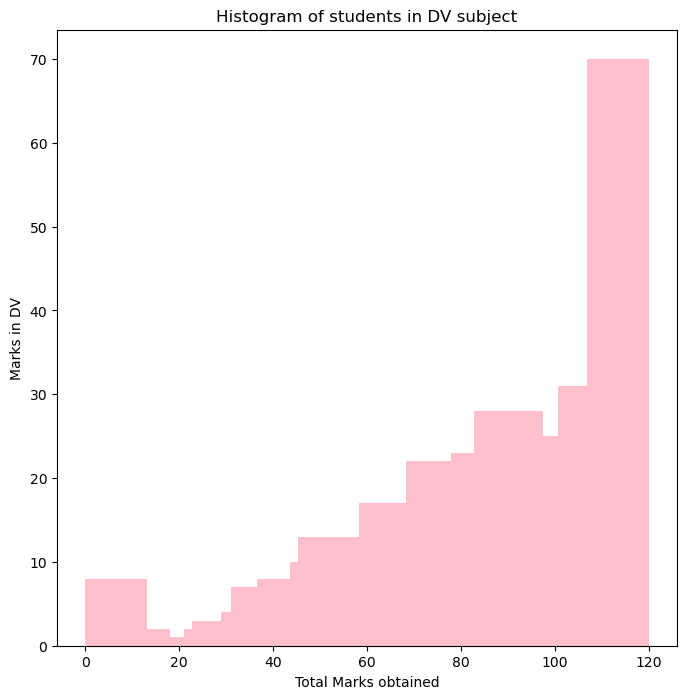

In [51]:
import matplotlib.pyplot as plt
a1=df.groupby('DV')['Total']
a1.hist(color = 'pink',figsize=[8,8],grid=False,bins=5)
plt.title("Histogram of students in DV subject")
plt.xlabel("Total Marks obtained")
plt.ylabel("Marks in DV")
plt.show()


### The students who got 0 marks lessthan the students who got 120 marks

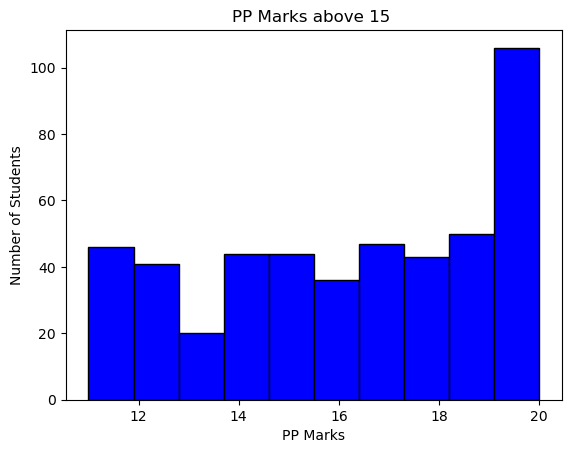

In [54]:
filtered_df = df[df['PP'] > 10]
plt.hist(filtered_df['PP'], bins=10, color='blue', edgecolor='black')
plt.title("PP Marks above 15 ")
plt.xlabel("PP Marks")
plt.ylabel("Number of Students")
plt.show()


### There are many people who scored morethan 100 than 45.

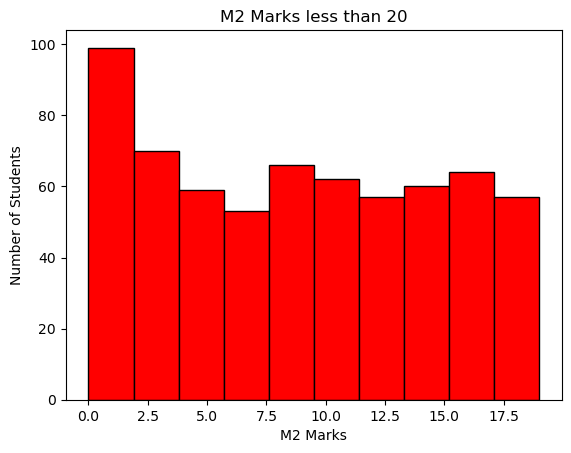

In [56]:
filtered_df = df[df['M2'] < 20]

plt.hist(filtered_df['M2'], bins=10, color='red', edgecolor='black')
plt.title("M2 Marks less than 20")
plt.xlabel("M2 Marks")
plt.ylabel("Number of Students")
plt.show()


### M2 Marks Who got less than 10

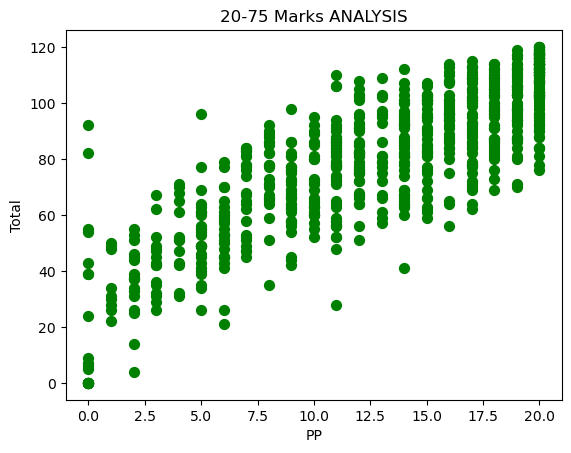

In [58]:
df.plot.scatter(x='PP',y='Total',color='green',s=50)
plt.title("20-75 Marks ANALYSIS")
plt.show()

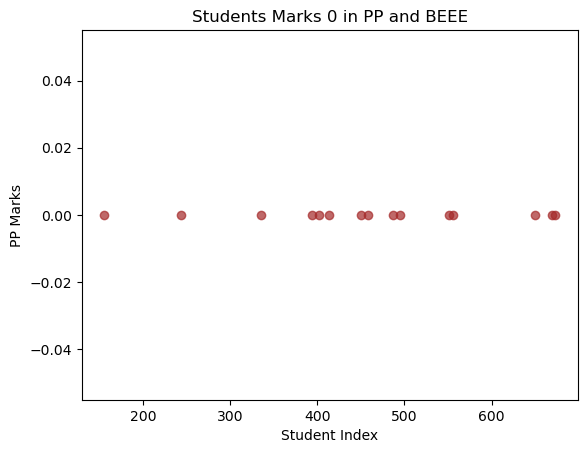

In [59]:
filtered_df = df[(df['PP'] == 0) & (df['BEEE'] == 0)]
plt.scatter(filtered_df.index, filtered_df['PP'], alpha=0.7, color='brown')
plt.title("Students Marks 0 in PP and BEEE")
plt.xlabel("Student Index")
plt.ylabel("PP Marks")
plt.show()


### Students who got zero in BEEE and PP

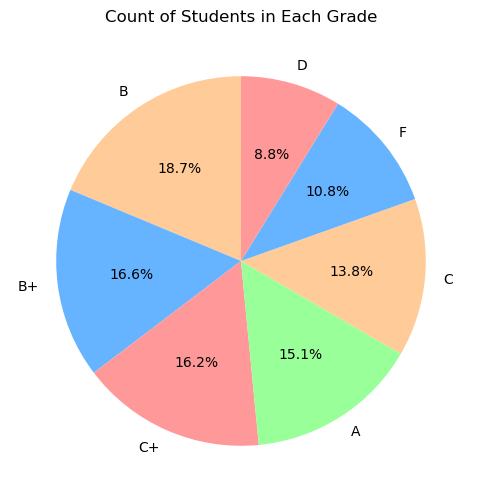

In [62]:
grade_counts_students = df['Grade'].value_counts()

plt.figure(figsize=(6,6))
grade_counts_students.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ffcc99', '#66b3ff', '#ff9999', '#99ff99'])
plt.title('Count of Students in Each Grade')
plt.ylabel('')  
plt.show()


### the highest grade is B

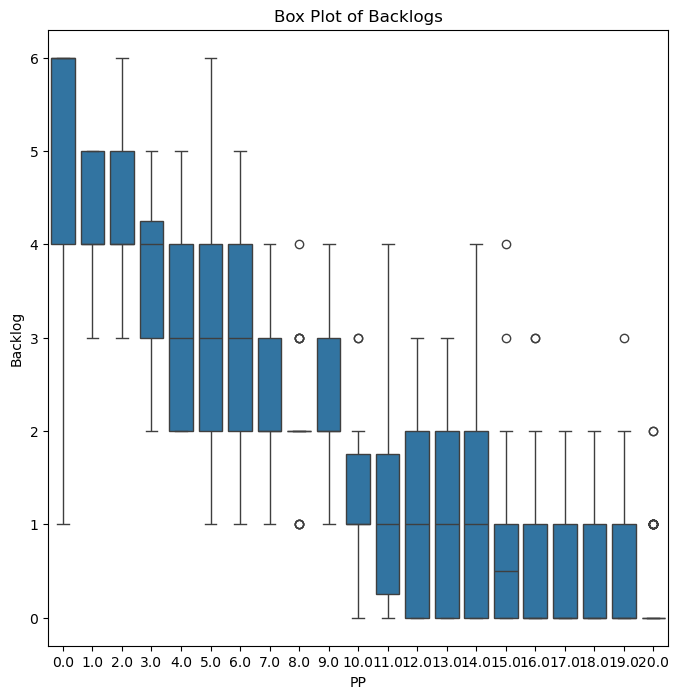

In [64]:
plt.figure(figsize=(8, 8))  
sns.boxplot(x='PP', y='backlogs', data=df)  
plt.xlabel("PP")  
plt.ylabel("Backlog")  
plt.title("Box Plot of Backlogs") 
plt.show()

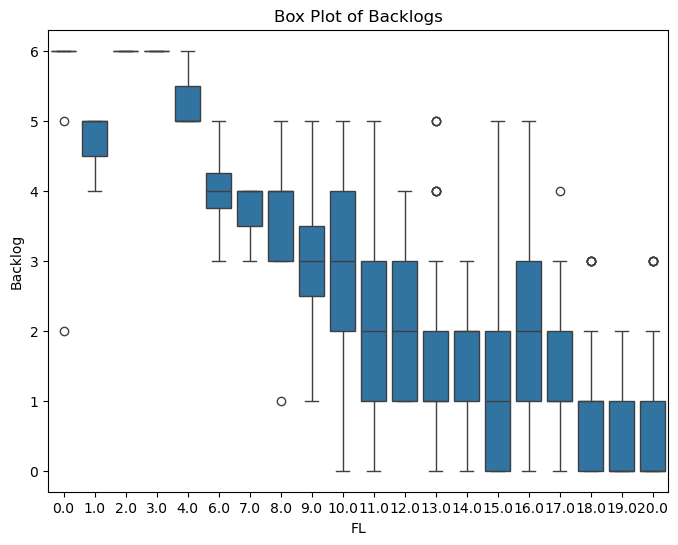

In [65]:
plt.figure(figsize=(8, 6))  
sns.boxplot(x='FL', y='backlogs', data=df)  
plt.xlabel("FL")  
plt.ylabel("Backlog")  
plt.title("Box Plot of Backlogs") 
plt.show()

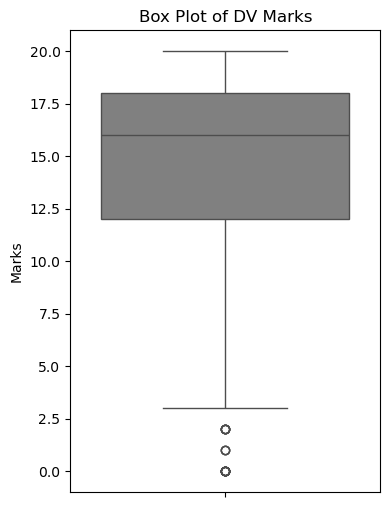

In [66]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=df['DV'], color='grey')
plt.title("Box Plot of DV Marks")
plt.ylabel("Marks")
plt.show()


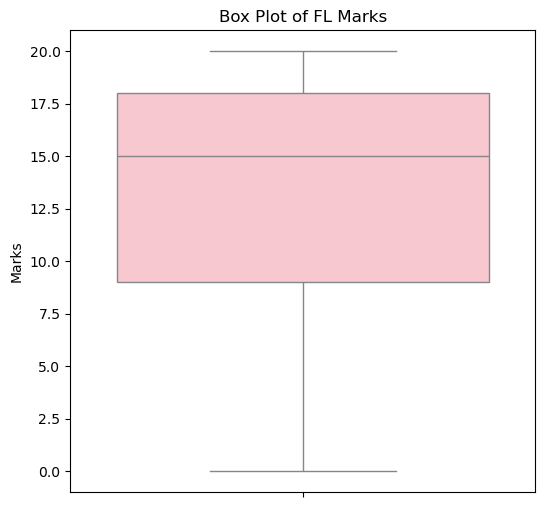

In [68]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df['BEEE'], color='pink')
plt.title("Box Plot of FL Marks")
plt.ylabel("Marks")
plt.show()


In [69]:
b=df.loc[(df['Total'] >= 115) & (df['Total'] <= 120)]
b=b.reset_index()
b

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,backlogs,Programming Skills,DV Skills
0,11,12.0,ALPHA,20.0,20.0,20.0,20.0,19.0,16.0,115.0,96,A,0,Very Good,Very Good
1,23,24.0,ALPHA,20.0,20.0,20.0,20.0,20.0,18.0,118.0,98,A,0,Very Good,Very Good
2,69,70.0,ALPHA,20.0,20.0,20.0,19.0,20.0,18.0,117.0,98,A,0,Very Good,Very Good
3,79,80.0,ALPHA,19.0,20.0,20.0,19.0,20.0,17.0,115.0,96,A,0,Very Good,Very Good
4,115,116.0,BETA,20.0,20.0,20.0,20.0,20.0,17.0,117.0,98,A,0,Very Good,Very Good
5,132,133.0,BETA,20.0,18.0,20.0,20.0,20.0,18.0,116.0,97,A,0,Very Good,Very Good
6,137,138.0,BETA,20.0,20.0,20.0,20.0,18.0,18.0,116.0,97,A,0,Very Good,Very Good
7,182,183.0,DELTA,18.0,19.0,19.0,20.0,20.0,20.0,116.0,97,A,0,Very Good,Very Good
8,198,199.0,DELTA,20.0,20.0,20.0,20.0,20.0,18.0,118.0,98,A,0,Very Good,Very Good
9,251,252.0,DELTA,20.0,20.0,20.0,19.0,20.0,20.0,119.0,99,A,0,Very Good,Very Good


Text(0.5, 1.0, 'Pie Chart of FL')

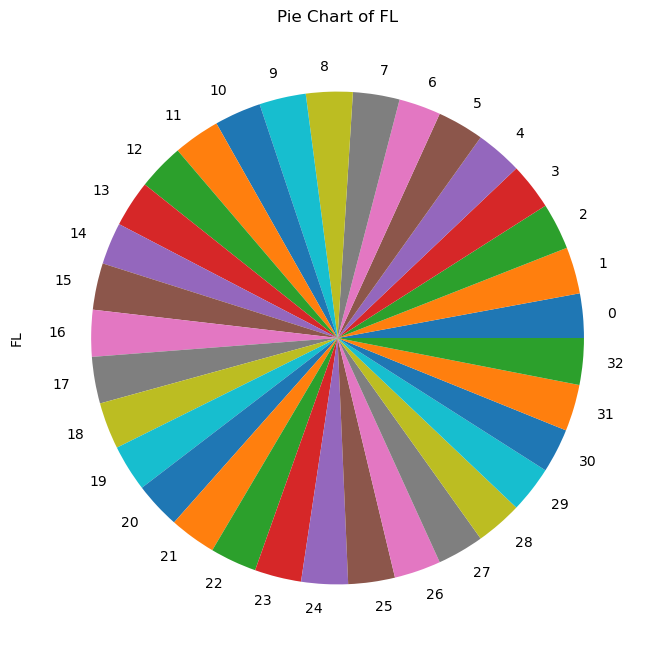

In [70]:
b['FL'].plot(kind='pie',subplots=True,figsize=(8,8))
plt.title("Pie Chart of FL")

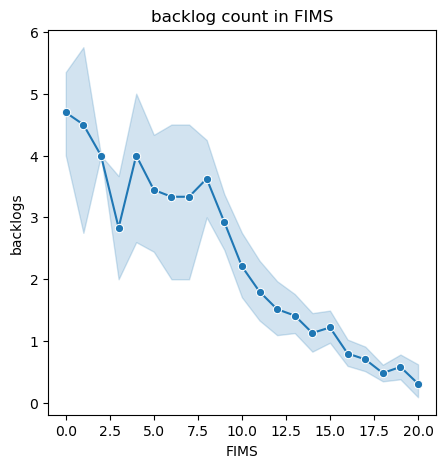

In [71]:
plt.figure(figsize=(5, 5))
sns.lineplot(x="FIMS", y="backlogs", data=df,marker="o")
plt.xlabel("FIMS")
plt.ylabel("backlogs")
plt.title("backlog count in FIMS")
plt.show()

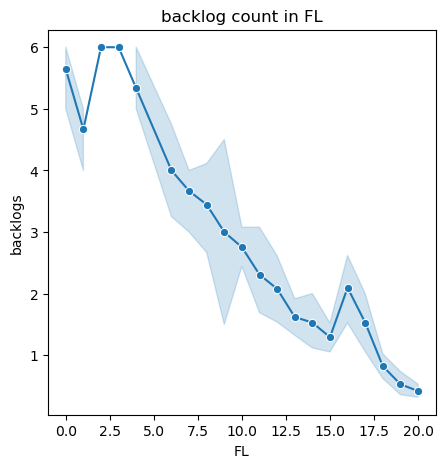

In [72]:
plt.figure(figsize=(5, 5))
sns.lineplot(x="FL", y="backlogs", data=df,marker="o")
plt.xlabel("FL")
plt.ylabel("backlogs")
plt.title("backlog count in FL")
plt.show()

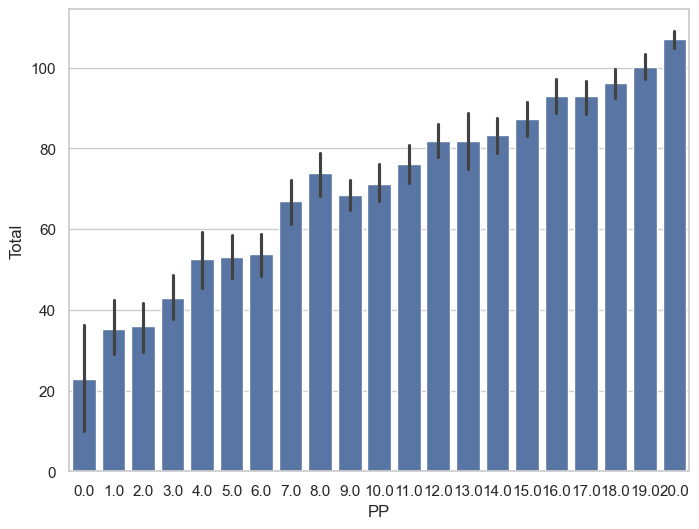

In [74]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x='PP', y='Total', data=df) 
plt.xlabel("PP")  
plt.ylabel("Total") 
plt.show()

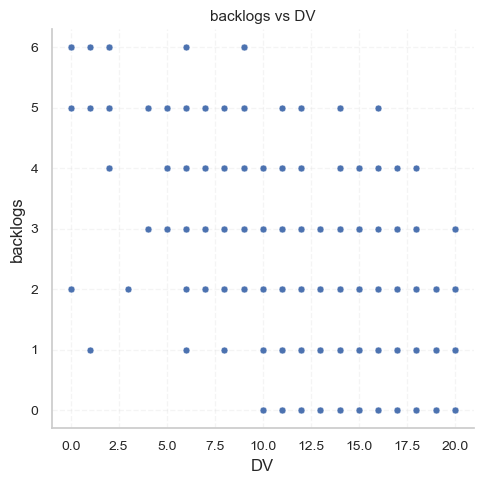

In [75]:
sns.relplot(data=df, x="DV", y="backlogs",s=25)
plt.title("backlogs vs DV", fontsize=11) 
plt.grid(True, linestyle="--", alpha=0.2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [76]:
df["DV"] = pd.to_numeric(df["DV"], errors="coerce") 
(df[df["DV"] > 10]["DV"].value_counts()) / len(df) 

DV
20.0    0.143855
17.0    0.110335
16.0    0.103352
18.0    0.096369
15.0    0.087989
19.0    0.083799
11.0    0.060056
12.0    0.057263
14.0    0.057263
13.0    0.041899
Name: count, dtype: float64

In [77]:
passing_mark = 10
alpha_section = df[df['SECTION'] == 'ALPHA'].copy()  
alpha_section.loc[:, 'DV'] = pd.to_numeric(alpha_section['DV'], errors='coerce')
alpha_section.loc[:, 'DV Result'] = alpha_section['DV'].apply(lambda x: 'Pass' if x >= passing_mark else 'Fail')
alpha_mii_pass_fail_counts = alpha_section['DV Result'].value_counts()
print("ALPHA Section: DV Pass/Fail Counts")
print(alpha_mii_pass_fail_counts)

ALPHA Section: DV Pass/Fail Counts
DV Result
Pass    73
Fail    17
Name: count, dtype: int64


In [78]:
passing_mark = 10
alpha_section = df[df['SECTION'] == 'ALPHA'].copy()  
alpha_section.loc[:, 'PP'] = pd.to_numeric(alpha_section['PP'], errors='coerce')
alpha_section.loc[:, 'PP Result'] = alpha_section['PP'].apply(lambda x: 'Pass' if x >= passing_mark else 'Fail')
alpha_mii_pass_fail_counts = alpha_section['PP Result'].value_counts()
print("ALPHA Section: PP Pass/Fail Counts")
print(alpha_mii_pass_fail_counts)

ALPHA Section: PP Pass/Fail Counts
PP Result
Pass    78
Fail    12
Name: count, dtype: int64


In [79]:
passing_mark = 10
alpha_section = df[df['SECTION'] == 'ALPHA'].copy()  
alpha_section.loc[:, 'BEEE'] = pd.to_numeric(alpha_section['BEEE'], errors='coerce')
alpha_section.loc[:, 'BEEE Result'] = alpha_section['BEEE'].apply(lambda x: 'Pass' if x >= passing_mark else 'Fail')
alpha_mii_pass_fail_counts = alpha_section['BEEE Result'].value_counts()
print("ALPHA Section: BEEE Pass/Fail Counts")
print(alpha_mii_pass_fail_counts)

ALPHA Section: BEEE Pass/Fail Counts
BEEE Result
Pass    82
Fail     8
Name: count, dtype: int64


In [80]:
passing_mark = 10
alpha_section = df[df['SECTION'] == 'ALPHA'].copy()  
alpha_section.loc[:, 'FL'] = pd.to_numeric(alpha_section['FL'], errors='coerce')
alpha_section.loc[:, 'FL Result'] = alpha_section['FL'].apply(lambda x: 'Pass' if x >= passing_mark else 'Fail')
alpha_mii_pass_fail_counts = alpha_section['FL Result'].value_counts()
print("ALPHA Section: FL Pass/Fail Counts")
print(alpha_mii_pass_fail_counts)

ALPHA Section: FL Pass/Fail Counts
FL Result
Pass    89
Fail     1
Name: count, dtype: int64


In [81]:
passing_mark = 10
alpha_section = df[df['SECTION'] == 'ALPHA'].copy()  
alpha_section.loc[:, 'FIMS'] = pd.to_numeric(alpha_section['FIMS'], errors='coerce')
alpha_section.loc[:, 'FIMS Result'] = alpha_section['FIMS'].apply(lambda x: 'Pass' if x >= passing_mark else 'Fail')
alpha_mii_pass_fail_counts = alpha_section['FIMS Result'].value_counts()
print("ALPHA Section: FIMS Pass/Fail Counts")
print(alpha_mii_pass_fail_counts)

ALPHA Section: FIMS Pass/Fail Counts
FIMS Result
Pass    68
Fail    22
Name: count, dtype: int64


In [82]:
df[df["SECTION"]== "ALPHA"].mean(numeric_only=True)

S.NO          45.500000
DV            13.411111
M2            13.711111
PP            15.933333
BEEE          15.622222
FL            16.177778
FIMS          12.700000
Total         87.555556
Percentage    72.922222
backlogs       0.866667
dtype: float64

In [83]:
df[df["SECTION"]== "BETA"].mean(numeric_only=True)

S.NO          135.500000
DV             13.000000
M2             12.122222
PP             15.966667
BEEE           10.855556
FL             15.977778
FIMS           14.044444
Total          81.966667
Percentage     68.277778
backlogs        1.144444
dtype: float64

In [84]:
df.groupby(["SECTION"]).mean(numeric_only=True)

,S.NO,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,backlogs
SECTION,,,,,,,,,,
0,0.000000,16.423077,13.230769,14.807692,13.115385,15.692308,16.692308,89.961538,75.000000,0.846154
ALPHA,45.500000,13.411111,13.711111,15.933333,15.622222,16.177778,12.700000,87.555556,72.922222,0.866667
BETA,135.500000,13.000000,12.122222,15.966667,10.855556,15.977778,14.044444,81.966667,68.277778,1.144444
DELTA,225.500000,13.866667,9.500000,12.422222,9.455556,14.555556,16.577778,76.377778,63.611111,1.533333
EPSILON,314.500000,15.215909,6.693182,8.568182,14.431818,15.318182,12.068182,72.295455,60.238636,1.863636
GAMMA,403.500000,14.811111,9.288889,10.777778,14.788889,15.633333,12.433333,77.733333,64.800000,1.500000
OMEGA,493.500000,16.555556,8.266667,14.611111,13.522222,15.633333,15.100000,83.688889,69.733333,1.377778
SIGMA,570.080645,16.145161,12.645161,14.532258,13.258065,16.322581,15.451613,88.354839,73.661290,0.967742
ZETA,0.000000,15.255556,7.188889,9.211111,14.433333,14.933333,13.633333,74.655556,62.200000,1.933333


In [85]:
df.shape

(716, 14)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 717
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.NO                716 non-null    float64
 1   SECTION             716 non-null    object 
 2   DV                  716 non-null    float64
 3   M2                  716 non-null    float64
 4   PP                  716 non-null    float64
 5   BEEE                716 non-null    float64
 6   FL                  716 non-null    float64
 7   FIMS                716 non-null    float64
 8   Total               716 non-null    float64
 9   Percentage          716 non-null    int32  
 10  Grade               716 non-null    object 
 11  backlogs            716 non-null    int64  
 12  Programming Skills  716 non-null    object 
 13  DV Skills           716 non-null    object 
dtypes: float64(8), int32(1), int64(1), object(4)
memory usage: 81.1+ KB


In [156]:
df.groupby(["SECTION"]).mean(numeric_only=True)

,S.NO,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,backlogs
SECTION,,,,,,,,,,
0,0.000000,16.423077,13.230769,14.807692,13.115385,15.692308,16.692308,89.961538,75.000000,0.846154
ALPHA,45.500000,13.411111,13.711111,15.933333,15.622222,16.177778,12.700000,87.555556,72.922222,0.866667
BETA,135.500000,13.000000,12.122222,15.966667,10.855556,15.977778,14.044444,81.966667,68.277778,1.144444
DELTA,225.500000,13.866667,9.500000,12.422222,9.455556,14.555556,16.577778,76.377778,63.611111,1.533333
EPSILON,314.500000,15.215909,6.693182,8.568182,14.431818,15.318182,12.068182,72.295455,60.238636,1.863636
GAMMA,403.500000,14.811111,9.288889,10.777778,14.788889,15.633333,12.433333,77.733333,64.800000,1.500000
OMEGA,493.500000,16.555556,8.266667,14.611111,13.522222,15.633333,15.100000,83.688889,69.733333,1.377778
SIGMA,570.080645,16.145161,12.645161,14.532258,13.258065,16.322581,15.451613,88.354839,73.661290,0.967742
ZETA,0.000000,15.255556,7.188889,9.211111,14.433333,14.933333,13.633333,74.655556,62.200000,1.933333


In [166]:
import pandas as pd
from scipy.stats import ttest_ind

In [174]:
df[df["SECTION"] == "ALPHA"]["DV"]

0     12.0
1     19.0
2     18.0
3     15.0
4     18.0
      ... 
85     3.0
86    17.0
87    13.0
88     2.0
89    10.0
Name: DV, Length: 90, dtype: float64

In [176]:
df[df["SECTION"] == "BETA"]["DV"]

90     17.0
91     14.0
92     11.0
93     14.0
94     12.0
       ... 
175    14.0
176     6.0
177    12.0
178    16.0
179    15.0
Name: DV, Length: 90, dtype: float64

In [204]:
group1 = df[df['SECTION']=='ALPHA']
group2 = df[df['SECTION']=='BETA']
ttest_ind(group1['DV'], group2['DV'])

TtestResult(statistic=0.6207084248259586, pvalue=0.5355854399866022, df=178.0)

In [206]:
group1 = df[df['SECTION']=='ALPHA']
group2 = df[df['SECTION']=='BETA']
ttest_ind(group1['DV'], group2['DV'], equal_var=False)

TtestResult(statistic=0.6207084248259586, pvalue=0.5356400219163465, df=166.5388753745943)

In [210]:
import pandas as pd
from scipy.stats import ttest_rel
group1 = df[df['SECTION']=='ALPHA']
group2 = df[df['SECTION']=='BETA']
ttest_rel(group1['DV'], group2['DV'])

TtestResult(statistic=0.6677896583545824, pvalue=0.5059958752914141, df=89)

In [258]:
import pandas as pd
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['SECTION'], df['DV'])
stat, p, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
print(expected)
if p <= alpha:
    print("Dependent (Reject H0: There is a relationship between SECTION and DV)")
else:
    print("Independent (Fail to Reject H0: No significant relationship)")

[[ 0.39944134  0.10893855  0.21787709  0.03631285  0.1452514   0.39944134
   0.43575419  0.29050279  0.39944134  0.72625698  0.94413408  1.56145251
   1.48882682  1.08938547  1.48882682  2.2877095   2.68715084  2.86871508
   2.50558659  2.17877095  3.74022346]
 [ 1.38268156  0.37709497  0.75418994  0.12569832  0.5027933   1.38268156
   1.50837989  1.00558659  1.38268156  2.51396648  3.26815642  5.40502793
   5.15363128  3.77094972  5.15363128  7.91899441  9.30167598  9.9301676
   8.67318436  7.54189944 12.94692737]
 [ 1.38268156  0.37709497  0.75418994  0.12569832  0.5027933   1.38268156
   1.50837989  1.00558659  1.38268156  2.51396648  3.26815642  5.40502793
   5.15363128  3.77094972  5.15363128  7.91899441  9.30167598  9.9301676
   8.67318436  7.54189944 12.94692737]
 [ 1.38268156  0.37709497  0.75418994  0.12569832  0.5027933   1.38268156
   1.50837989  1.00558659  1.38268156  2.51396648  3.26815642  5.40502793
   5.15363128  3.77094972  5.15363128  7.91899441  9.30167598  9.930167

## Observation

After the dataset was cleaned and organized, several analyses were conducted. The initial step was to visualize the distribution of marks through histograms. The Total marks histogram gave information on how the students performed overall, whether the scores were normally distributed or skewed.

A targeted analysis was done on students who obtained a total score of 40. Filtering methods were used to determine and study their responses, specifically analyzing if there was a consistent pattern of full marks in some questions. A particular emphasis was given to Q6, determining instances where students obtained 10 marks in that section as well as a total score of 40.

Also, the dataset was converted completely by replacing missing values with 0 to avoid gaps in the records. This facilitated easier application of statistical calculations and visualizations. The final dataset was clean and well-formatted, with pertinent data without inconsistencies.

In general, the analysis produced a better visualization of student performance trends, grade patterns, and potential score adjustment. Additional procedures might involve correlation analysis among alternative question scores, mean/median computation, and even predictive modeling to determine contributing factors to student performance.